In [1]:
# Settings for notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Show Python version
import platform
platform.python_version()

'3.7.7'

In [2]:
try:
    import scrapy
except:
    !pip3 install scrapy
    import scrapy
from scrapy.crawler import CrawlerProcess

In [3]:
import json
import logging

class QuotesSpider(scrapy.Spider):
    name = "quotes"
    start_urls = [
        'http://www.ph.lacounty.gov/media/Coronavirus/locations.htm'
    ]
    custom_settings = {
        'LOG_LEVEL': logging.WARNING,
        'FEED_FORMAT':'json',                                 # Used for pipeline 2
        'FEED_URI': 'quoteresult.json'                        # Used for pipeline 2
    }
    
    def parse(self, response):
        cities = response.xpath('//table/tr/td[1]').extract()
        cases = response.xpath('//table/tr/td[2]').extract()
        rates = response.xpath('//table/tr/td[3]').extract()
        cities = list(map(lambda x: x.replace('<td>','').replace('</td>',''), cities))
        cases = list(map(lambda x: x.replace('<td>','').replace('</td>',''), cases))
        rates = list(map(lambda x: x.replace('<td>','').replace('</td>',''), rates))
        alist=[]
        lacitiesdata = { "lacitiescovid": alist }
        i = 0
        for city in cities:
            if i<28:
                i=i+1
                continue
            arec = { 'city': city, 'cases': cases[i] , 'rate':rates[i]}
            i=i+1
            alist.append(arec)
        with open('lacovidinfo.json', 'w') as jsonfile:
            print(json.dump(lacitiesdata, jsonfile, indent=4))
        alist

In [4]:
process = CrawlerProcess({
    'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'
})

process.crawl(QuotesSpider)
process.start()


2020-05-04 15:24:09 [scrapy.utils.log] INFO: Scrapy 2.0.1 started (bot: scrapybot)
2020-05-04 15:24:09 [scrapy.utils.log] INFO: Versions: lxml 4.5.0.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.5.2, w3lib 1.21.0, Twisted 20.3.0, Python 3.7.7 (default, Mar 11 2020, 09:39:49) - [GCC 5.4.0 20160609], pyOpenSSL 19.1.0 (OpenSSL 1.1.1d  10 Sep 2019), cryptography 2.8, Platform Linux-4.4.0-18362-Microsoft-x86_64-with-debian-buster-sid
2020-05-04 15:24:09 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.epollreactor.EPollReactor
2020-05-04 15:24:09 [scrapy.crawler] INFO: Overridden settings:
{'FEED_FORMAT': 'json',
 'FEED_URI': 'quoteresult.json',
 'LOG_LEVEL': 30,
 'USER_AGENT': 'Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 5.1)'}


None


In [5]:
import pandas as pd

def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

res = pd.read_json('lacovidinfo.json')
lcc = res.lacitiescovid
alist = []
llist = []
for x in lcc:
    if x['cases'] == '' or  x['cases'] == '--': 
        continue
    if x['rate'] == '--' or x['rate'] == '':
        continue
    if not is_number(x['cases']):
        continue
    if not is_number(x['rate']):
        continue
    anent = { 'city': x['city'], 'cases': float(x['cases']), 'rate': float(x['rate'])}
    alist.append(anent)
    if not x['city'].startswith('Los Angeles - '):
        continue
    llist.append(anent)
adf = pd.DataFrame(alist)
ldf = pd.DataFrame(llist)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(ldf)


                                      city  cases     rate
0            Los Angeles - Adams-Normandie   29.0   353.57
1                     Los Angeles - Alsace   32.0   257.13
2    Los Angeles - Angeles National Forest    0.0     0.00
3           Los Angeles - Angelino Heights    9.0   359.71
4                     Los Angeles - Arleta  121.0   352.05
5            Los Angeles - Atwater Village   34.0   231.83
6              Los Angeles - Baldwin Hills   65.0   208.84
7                    Los Angeles - Bel Air   30.0   355.91
8              Los Angeles - Beverly Crest   33.0   263.47
9                Los Angeles - Beverlywood   33.0   250.51
10             Los Angeles - Boyle Heights  236.0   271.63
11                 Los Angeles - Brentwood   65.0   209.98
12                 Los Angeles - Brookside    0.0     0.00
13          Los Angeles - Cadillac-Corning   20.0   280.86
14               Los Angeles - Canoga Park  318.0   487.07
15                   Los Angeles - Carthay   70.0   487.

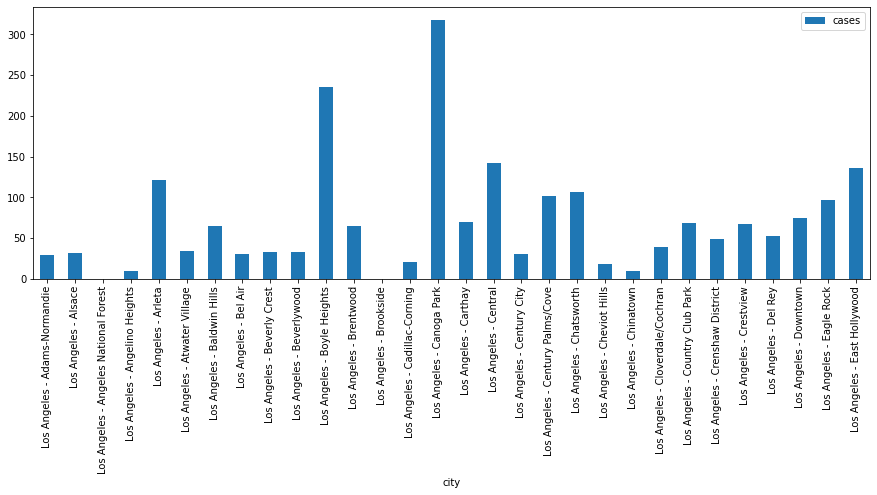

In [6]:
ldf[:30].plot(kind='bar', x='city', y='cases', figsize=(15,5))

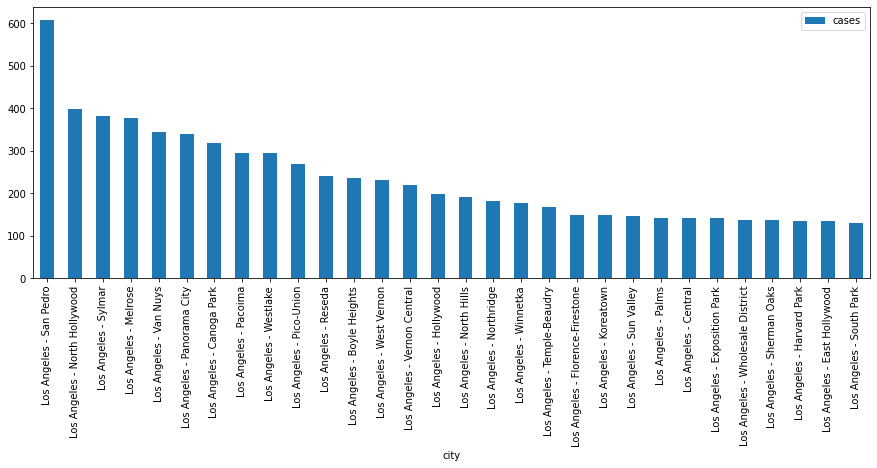

In [7]:
ldf.sort_values(by='cases', ascending=False)[:30].plot(kind='bar', x='city', y='cases', figsize=(15,5))

In [8]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(ldf.sort_values(by='rate', ascending=False))


                                      city  cases     rate
62            Los Angeles - Little Armenia   92.0  1146.42
94                 Los Angeles - San Pedro  609.0   780.39
120           Los Angeles - Vermont Square   51.0   666.06
85                Los Angeles - Pico-Union  269.0   642.89
25                 Los Angeles - Crestview   67.0   589.37
116           Los Angeles - Valley Village  128.0   517.80
132                 Los Angeles - Westlake  294.0   495.32
103                  Los Angeles - Sunland  101.0   494.90
15                   Los Angeles - Carthay   70.0   487.36
14               Los Angeles - Canoga Park  318.0   487.07
71                   Los Angeles - Melrose  378.0   486.51
51     Los Angeles - Historic Filipinotown   67.0   483.06
92              Los Angeles - Reseda Ranch   22.0   474.55
29            Los Angeles - East Hollywood  136.0   464.37
105                   Los Angeles - Sylmar  381.0   462.39
127               Los Angeles - West Adams  126.0   456.

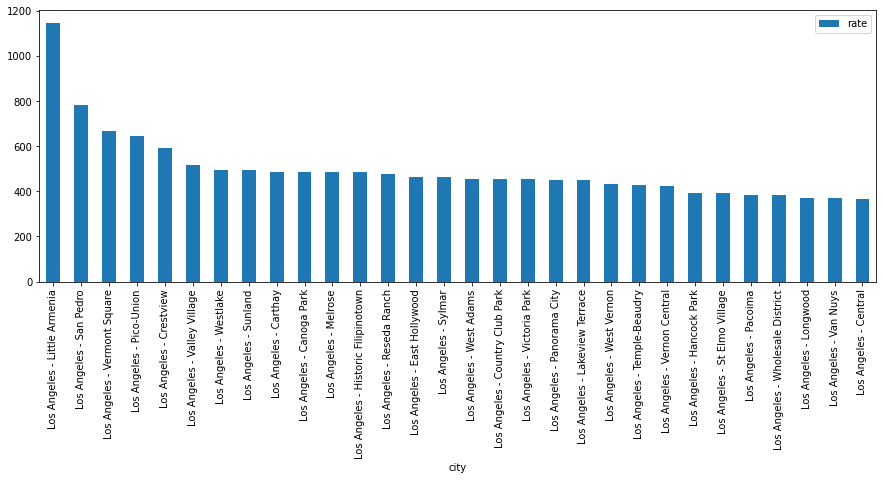

In [9]:
ldf.sort_values(by='rate', ascending=False)[:30].plot(kind='bar', x='city', y='rate', figsize=(15,5))

In [10]:
import os
import psycopg2

DATABASE_URL = os.environ['DATABASE_URL']

conn = psycopg2.connect(DATABASE_URL, sslmode='require')

In [11]:
cur = conn.cursor()
cur.execute("SELECT * FROM pg_catalog.pg_tables WHERE schemaname != 'pg_catalog' AND schemaname != 'information_schema';")
cur.fetchall()

[('public', 'test', 'blrxwnroakzmlk', None, True, False, False, False),
 ('public', 'lacovid2', 'blrxwnroakzmlk', None, True, False, False, False)]

In [12]:
#cur.execute("CREATE TABLE test (id serial PRIMARY KEY, num integer, data varchar);")

In [13]:
#cur.execute("INSERT INTO test (num, data) VALUES (%s, %s)",(100, "abc'def"))

In [14]:
cur.execute("SELECT * FROM test;")
cur.fetchone()

(1, 100, "abc'def")

In [15]:
cur.execute("DROP TABLE lacovid2;")
cur.execute("CREATE TABLE lacovid2 (id serial, city varchar PRIMARY KEY, cases float, rate float);")

In [16]:
for d in ldf.to_dict('records'):
   cur.execute("INSERT INTO lacovid2 (city, cases, rate) VALUES (%s, %s, %s)",(d['city'],d['cases'], d['rate']))

In [17]:
cur.execute("SELECT * FROM lacovid2 ORDER BY rate;")
cur.fetchall()

[(13, 'Los Angeles - Brookside', 0.0, 0.0),
 (3, 'Los Angeles - Angeles National Forest', 0.0, 0.0),
 (87, 'Los Angeles - Playa Del Rey', 1.0, 31.29),
 (69, 'Los Angeles - Mandeville Canyon', 1.0, 32.01),
 (48, 'Los Angeles - Harbor Pines', 1.0, 41.51),
 (38, 'Los Angeles - Faircrest Heights', 2.0, 55.56),
 (82, 'Los Angeles - Palisades Highlands', 3.0, 78.0),
 (85, 'Los Angeles - Park La Brea', 12.0, 88.37),
 (134, 'Los Angeles - Westwood', 52.0, 96.1),
 (91, 'Los Angeles - Regent Square', 3.0, 107.91),
 (22, 'Los Angeles - Chinatown', 9.0, 112.21),
 (110, 'Los Angeles - Toluca Lake', 10.0, 114.89),
 (70, 'Los Angeles - Mar Vista', 57.0, 134.21),
 (132, 'Los Angeles - Westchester', 71.0, 137.59),
 (31, 'Los Angeles - Echo Park', 20.0, 140.29),
 (109, 'Los Angeles - Thai Town', 14.0, 142.73),
 (129, 'Los Angeles - West Hills', 59.0, 145.52),
 (119, 'Los Angeles - Venice', 50.0, 147.56),
 (36, 'Los Angeles - Exposition', 5.0, 150.33),
 (111, 'Los Angeles - Toluca Terrace', 2.0, 153.14),

In [18]:
cur.execute("SELECT * FROM lacovid2 ORDER BY cases;")
cur.fetchall()

[(3, 'Los Angeles - Angeles National Forest', 0.0, 0.0),
 (13, 'Los Angeles - Brookside', 0.0, 0.0),
 (69, 'Los Angeles - Mandeville Canyon', 1.0, 32.01),
 (105, 'Los Angeles - Sycamore Square', 1.0, 154.56),
 (87, 'Los Angeles - Playa Del Rey', 1.0, 31.29),
 (48, 'Los Angeles - Harbor Pines', 1.0, 41.51),
 (38, 'Los Angeles - Faircrest Heights', 2.0, 55.56),
 (111, 'Los Angeles - Toluca Terrace', 2.0, 153.14),
 (112, 'Los Angeles - Toluca Woods', 3.0, 161.46),
 (82, 'Los Angeles - Palisades Highlands', 3.0, 78.0),
 (91, 'Los Angeles - Regent Square', 3.0, 107.91),
 (36, 'Los Angeles - Exposition', 5.0, 150.33),
 (125, 'Los Angeles - View Heights', 7.0, 189.5),
 (114, 'Los Angeles - University Hills', 7.0, 204.14),
 (65, 'Los Angeles - Little Tokyo', 7.0, 223.43),
 (33, 'Los Angeles - Elysian Park', 9.0, 157.56),
 (71, 'Los Angeles - Marina Peninsula', 9.0, 206.42),
 (96, 'Los Angeles - Shadow Hills', 9.0, 202.61),
 (22, 'Los Angeles - Chinatown', 9.0, 112.21),
 (4, 'Los Angeles - Ange

In [19]:
cur.execute("SELECT * FROM lacovid2 WHERE city = 'Los Angeles - Eagle Rock';")
cur.fetchall()

[(29, 'Los Angeles - Eagle Rock', 97.0, 245.02)]

In [20]:
conn.commit()
cur.close()
conn.close()